In [1]:
#We are applying a deep learning model on mnist dataset
#Digits dataset : 0,1,2, ..., 9 in the form of images

#Data load
#Preprocessing and Analyzing data
#Define model
#Compile model
#Model fit
#Evaluate model

In [2]:
from keras.datasets import mnist

In [3]:
#train_data, test_data = mnist.load_data() #unpacking
#(train_images, train_labels) = train_data #unpacking the train data
#(test_images, test_labels) = test_data

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #unpacking

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
from matplotlib.pyplot import imshow

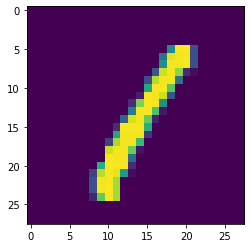

In [6]:
imshow(train_images[3].reshape(28,28))

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_labels[0]

5

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
test_labels.shape

(10000,)

In [13]:
from keras import models
from keras import layers

In [14]:
#This problem is multi-class classification

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#for multiclass classification problem:
#Last layer activation function -> softmax
#Loss function - Categorical crossentropy (for one hot encoded data) or sparse categorical cross entropy with no one-hot encoding

#Metrics
#For classification -> accuracy
#For regression -> MSE


In [16]:
train_images = train_images.reshape((60000, 28 * 28))   #Converting image to one-dimension
train_images = train_images.astype('float32') / 255     #Converting pixels between 0 and 1 i.e. normalization

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2535 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1026 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0681 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0500 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9888


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0621 - accuracy: 0.9807


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9807000160217285


In [20]:
network.predict(train_images[3].reshape((1,28*28)))

1/1 [==============================] - 0s 87ms/step


array([[8.7763654e-09, 9.9995542e-01, 5.5888245e-06, 4.9654680e-08,
        3.2297644e-06, 1.6507673e-09, 3.7300318e-08, 2.7244861e-05,
        8.4022859e-06, 2.1814248e-09]], dtype=float32)

In [21]:
network.predict(train_images[3].reshape((1,28*28))).argmax()

1/1 [==============================] - 0s 22ms/step


1

In [22]:
#Let's do it in another way with one-hot encoded data

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
train_labels = to_categorical(train_labels)

In [25]:
test_labels = to_categorical(test_labels)

In [26]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
#This problem is multi-class classification

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2613 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1044 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0690 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0493 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0378 - accuracy: 0.9887


In [28]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
import numpy as np

In [30]:
salary = np.array([100, 110, 120]) #1D tensor

In [31]:
salary.ndim

1

In [32]:
#1.2 - O dimensional tensor
#[1,3,7] - 1 dimensional tensor

In [33]:
arr = np.array([[1,7,9],[3,4,5]]) #2D tensor

In [34]:
arr

array([[1, 7, 9],
       [3, 4, 5]])

In [35]:
arr.ndim

2

In [36]:
arr.shape

(2, 3)

In [37]:
arr.dtype

dtype('int32')

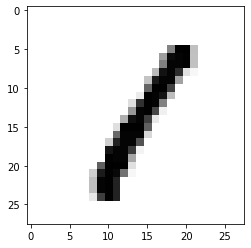

In [38]:
imshow(train_images[3].reshape(28,28), cmap='binary')

In [39]:
#Age, Pregnancies, Systolic, Disystolic
patients = np.array([
    [29,0,120,80],
    [39,1,129,89],
    [49,3,120,80]    
])

In [40]:
patients.shape

(3, 4)

In [41]:
patients[0,2]

120

In [42]:
from sklearn.feature_extraction.text import CountVectorizer #Import vetorizer from sklearn

In [43]:
#Vectorization - Convert textual data into vector form
#How to convert text documents to features

In [44]:
text = [
    "The stop_words_ attribute can get large and increase the model size when pickling. This attribute is provided only for introspection and can be safely removed using delattr or set to None before pickling.",
    "Learn vocabulary and idf, return document-term matrix.",
    "This is equivalent to fit followed by transform, but more efficiently implemented."
]

In [45]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)

In [46]:
vectorizer.get_feature_names()

E:\Conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['and',
 'attribute',
 'be',
 'before',
 'but',
 'by',
 'can',
 'delattr',
 'document',
 'efficiently',
 'equivalent',
 'fit',
 'followed',
 'for',
 'get',
 'idf',
 'implemented',
 'increase',
 'introspection',
 'is',
 'large',
 'learn',
 'matrix',
 'model',
 'more',
 'none',
 'only',
 'or',
 'pickling',
 'provided',
 'removed',
 'return',
 'safely',
 'set',
 'size',
 'stop_words_',
 'term',
 'the',
 'this',
 'to',
 'transform',
 'using',
 'vocabulary',
 'when']

In [47]:
X.data

array([2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [48]:
#TFIDF = Term frequency, inverse document frequency

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer #Import vetorizer from sklearn

In [50]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

In [51]:
X.data

array([0.15801753, 0.15801753, 0.1201764 , 0.15801753, 0.15801753,
       0.15801753, 0.15801753, 0.15801753, 0.15801753, 0.15801753,
       0.15801753, 0.15801753, 0.15801753, 0.15801753, 0.1201764 ,
       0.1201764 , 0.31603506, 0.15801753, 0.15801753, 0.15801753,
       0.15801753, 0.24035281, 0.15801753, 0.15801753, 0.31603506,
       0.31603506, 0.15801753, 0.31603506, 0.36325471, 0.36325471,
       0.36325471, 0.36325471, 0.36325471, 0.36325471, 0.36325471,
       0.27626457, 0.30520733, 0.30520733, 0.30520733, 0.30520733,
       0.30520733, 0.30520733, 0.30520733, 0.30520733, 0.30520733,
       0.23211804, 0.23211804, 0.23211804])

In [52]:
#Time series data

In [53]:
#Weather data - temp, pressure, humidity

In [55]:
#Broadcasting

In [56]:
import numpy as np

In [57]:
X = np.array([1,3,7]) # 1D array #Expands dimension

In [58]:
Y = np.array([[1,1,1],
              [2,2,2]
             ]) #2D array

In [59]:
X+Y

array([[2, 4, 8],
       [3, 5, 9]])